## Predicting Car Price

This data is a **regression problem**, trying to predict selling price of car.

The followings describe the features.

- **name**: name and brand of car
- **Year**: 
- **selling_price**: price of selling car
- **km_driven**: how many kilometer car is driven
- **fuel**: Type of fuel that car consume (Diesel, Petrol, LPG, CNG)
- **seller_type**: who is seller (Individual, Dealer, Trustmark Dealer)
- **transmission**: Type of gear (Manual, Automatic)
- **owner**: First Owner, Second Owner, Third Owner, Fourth & Above Owner
- **mileage**: how many kilometer per 1 liter of fuel that car can drive
- **engine**: 
- **max_power**: the maximum power of the cars
- **seats**: 

The Chaky company make new car with his brand (new brand) and want to find selling car price of the car.

In this assignment, I will try to train many model in different value of parameter.

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter('ignore')

## 1. Load data

In [2]:
df = pd.read_csv('Cars.csv')

In [3]:
# Print the first five rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Check the shape of your data
df.shape

(8128, 13)

In [5]:
# Show Statistical information of data
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
# Check data type of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### Some data preparation

In [7]:
# Replace First Owner to 1, Second Owner to 2, Third Owner to 3, Fourth & Above Owner to 4, Test Drive Car to 5
df["owner"] = df["owner"].replace(["First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner", "Test Drive Car"], [1, 2, 3, 4, 5])

In [8]:
# Remove all rows with CNG and LPG
df.drop(df[(df['fuel']=='LPG') | (df['fuel']=='CNG')].index, inplace = True)

In [9]:
# Remove 'kmpl' and convert the column to float
df['mileage'] = df['mileage'].str.replace('kmpl', '').astype('float64')

In [10]:
# Remove 'CC' and convert the column to float
df['engine'] = df['engine'].str.replace('CC', '').astype('float64')

In [11]:
# Remove 'bhp' and convert the column to float
df['max_power'] = df['max_power'].str.replace('bhp', '').astype('float64')

In [12]:
# Rename the name column and assign only the first word of car's name
df['name'] = df['name'].str.split().str[0]
df = df.rename(columns={'name': 'brand'}) 

In [13]:
# Drop the feature torque
df.drop('torque', axis='columns', inplace=True)

In [14]:
# Remove all car that is test drive car
df.drop(df[df['owner']==5].index, inplace = True)

In [15]:
# Take log transform to selling_price column
df['selling_price'] = np.log(df['selling_price'])

In [16]:
# Print the first five rows of data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [17]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 815.3+ KB


### Convert every column to numeric

In [18]:
# label encoding in brand column

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

In [19]:
# label encoding in fuel column
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])


In [20]:
# label encoding in seller type column
le = LabelEncoder()
df["seller_type"] = le.fit_transform(df["seller_type"])

In [21]:
# label encoding in transmission column
le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [22]:
#one-hot encoding in owner
df  = pd.get_dummies(df,  columns=['owner'], drop_first=True)

In [23]:
# Print the first five rows of data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,mileage,engine,max_power,seats,owner_2,owner_3,owner_4
0,20,2014,13.017003,145500,0,1,1,23.40,1248.0,74.00,5.0,0,0,0
1,27,2014,12.821258,120000,0,1,1,21.14,1498.0,103.52,5.0,1,0,0
2,10,2006,11.970350,140000,1,1,1,17.70,1497.0,78.00,5.0,0,1,0
3,11,2010,12.323856,127000,0,1,1,23.00,1396.0,90.00,5.0,0,0,0
4,20,2007,11.775290,120000,1,1,1,16.10,1298.0,88.20,5.0,0,0,0


In [24]:
# Check the data type of all column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   int64  
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   float64
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int64  
 5   seller_type    8028 non-null   int64  
 6   transmission   8028 non-null   int64  
 7   mileage        7814 non-null   float64
 8   engine         7814 non-null   float64
 9   max_power      7820 non-null   float64
 10  seats          7814 non-null   float64
 11  owner_2        8028 non-null   uint8  
 12  owner_3        8028 non-null   uint8  
 13  owner_4        8028 non-null   uint8  
dtypes: float64(5), int64(6), uint8(3)
memory usage: 776.1 KB


Now, all of column are numeric 

## 2. Exploratory Data Analysis

EDA is the step to see the data distribution and let us better understand the data.

### Multivariate analysis

#### Boxplot

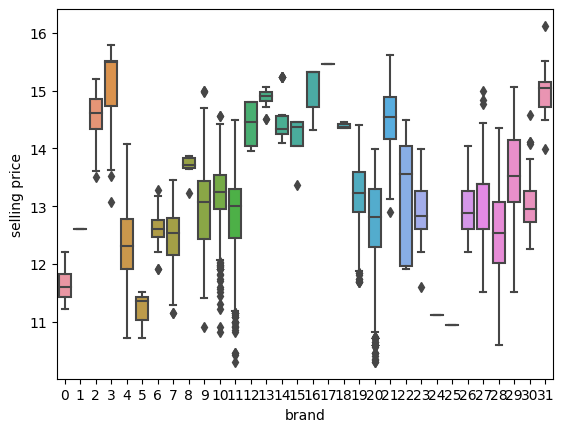

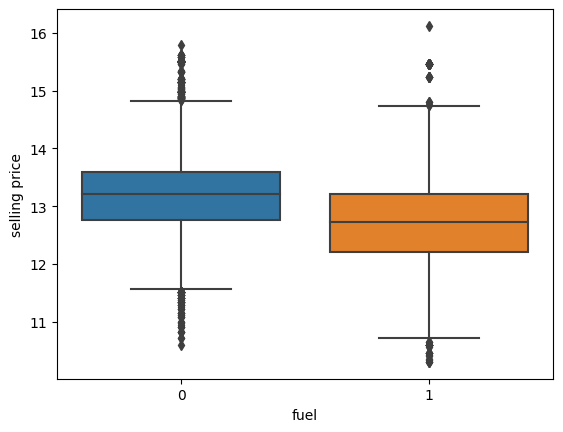

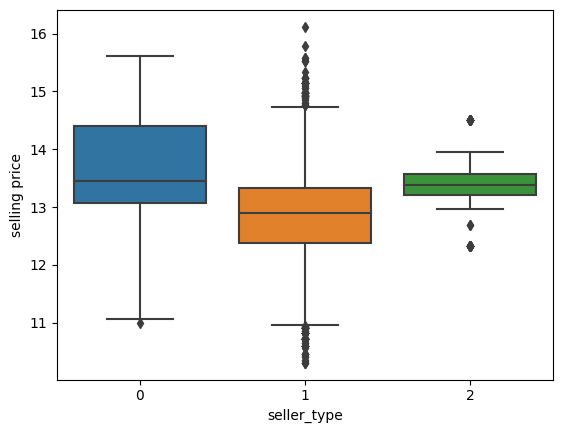

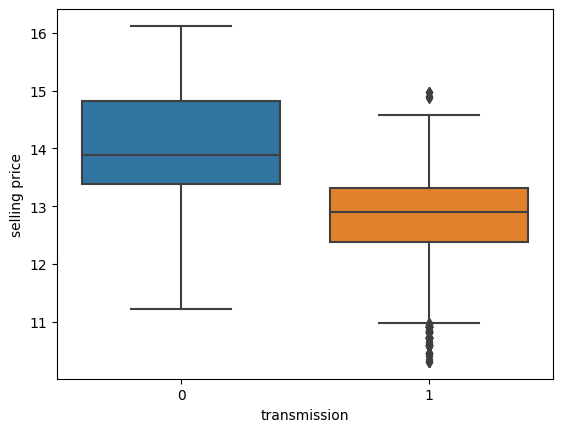

In [25]:
# Create bar plot for category columns with selling price
for col in df[['brand', 'fuel', 'seller_type', 'transmission']].columns:
    sns.boxplot(x = df[col], y = df["selling_price"])
    plt.ylabel("selling price")
    plt.xlabel(col)
    plt.show()

From the box plot, I can analyze 2 things:
1. The car with automatic transmission has higher selling price than the car with manual transmission (transmission and selling price box plot)
2. The more owner, The lower the selling price (owner and selling price box plot)

#### Scatterplot plot

<Axes: xlabel='max_power', ylabel='engine'>

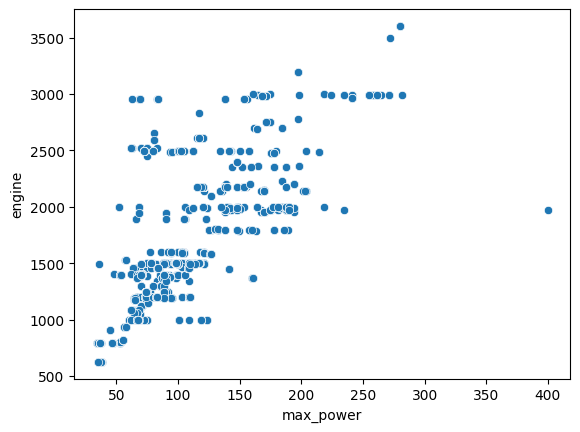

In [26]:
# To see the relation between max power and engine
sns.scatterplot(x = df['max_power'], y = df['engine'])

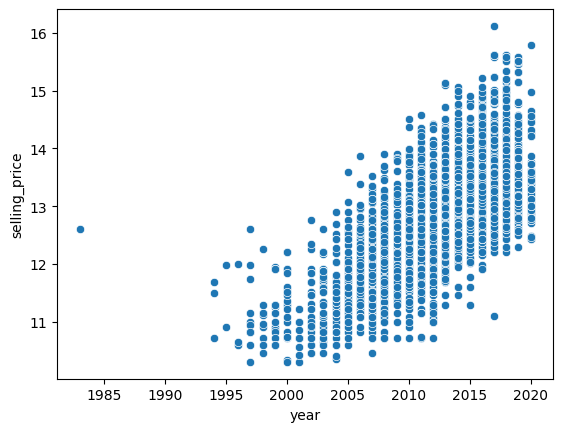

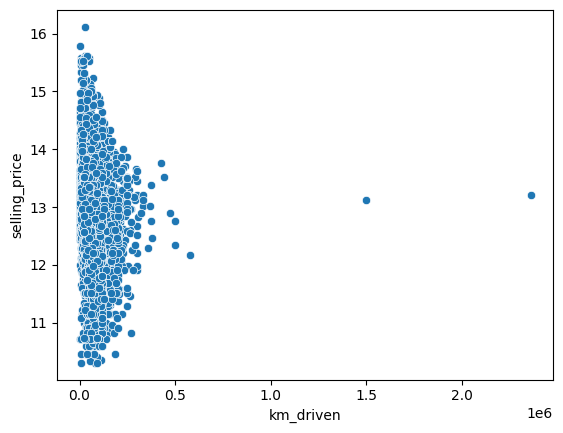

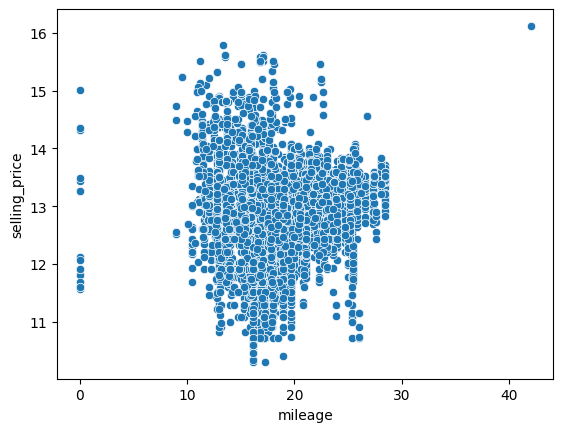

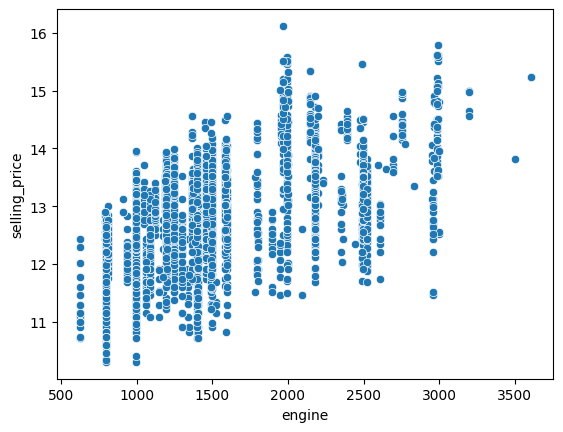

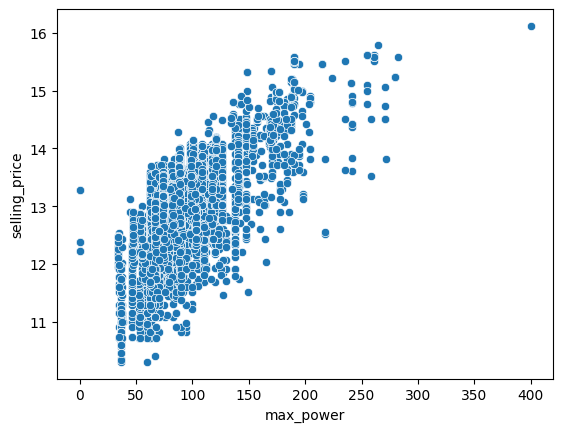

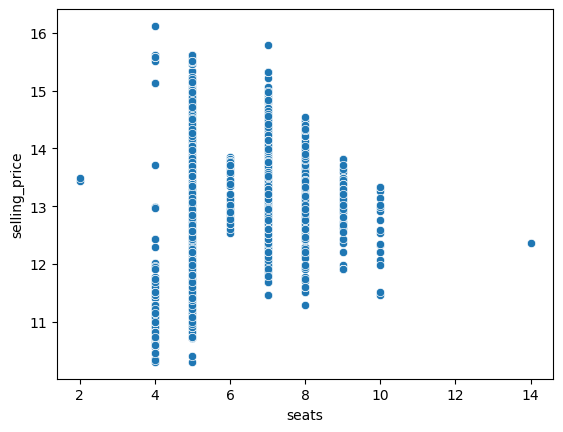

In [27]:
# Create scatter plot for numeric columns with selling price
for col in df[['year','km_driven', 'mileage', 'engine', 'max_power', 'seats']].columns:
    sns.scatterplot(x = df[col], y = df['selling_price'])
    plt.show()

From the scatter plot, I can analyze 3 things:
1. the most of max power and engine data is linear correlation. When max power increases, the engine increases (max power and engine graph)
2. If the car is new, the price is high (year and selling price graph)
3. When the max power of the car is high, and the price is high (max power and selling price graph)

#### Correlation Matrix

Use correlation matrix to find the strong feature to predict selling price of a car and check the feature which correlate to each other.

<Axes: >

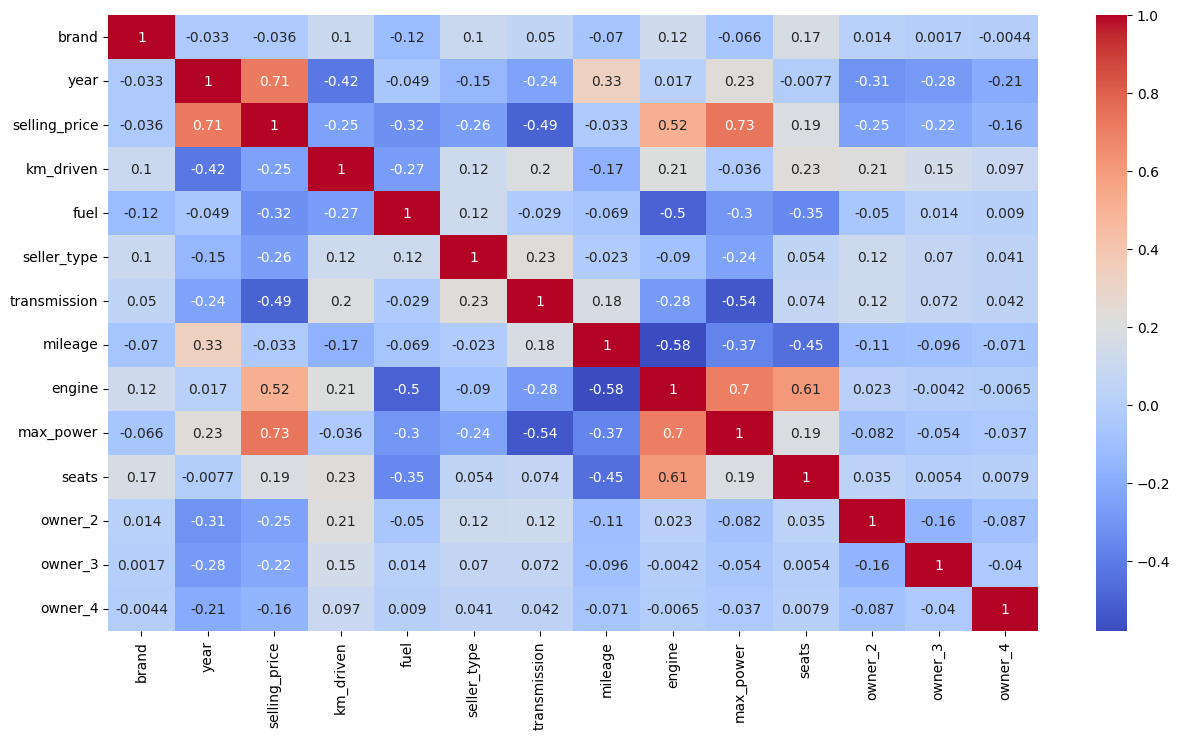

In [28]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Predictive Power Score

To see how well each 1 feature predict target feature 

<Axes: xlabel='x', ylabel='y'>

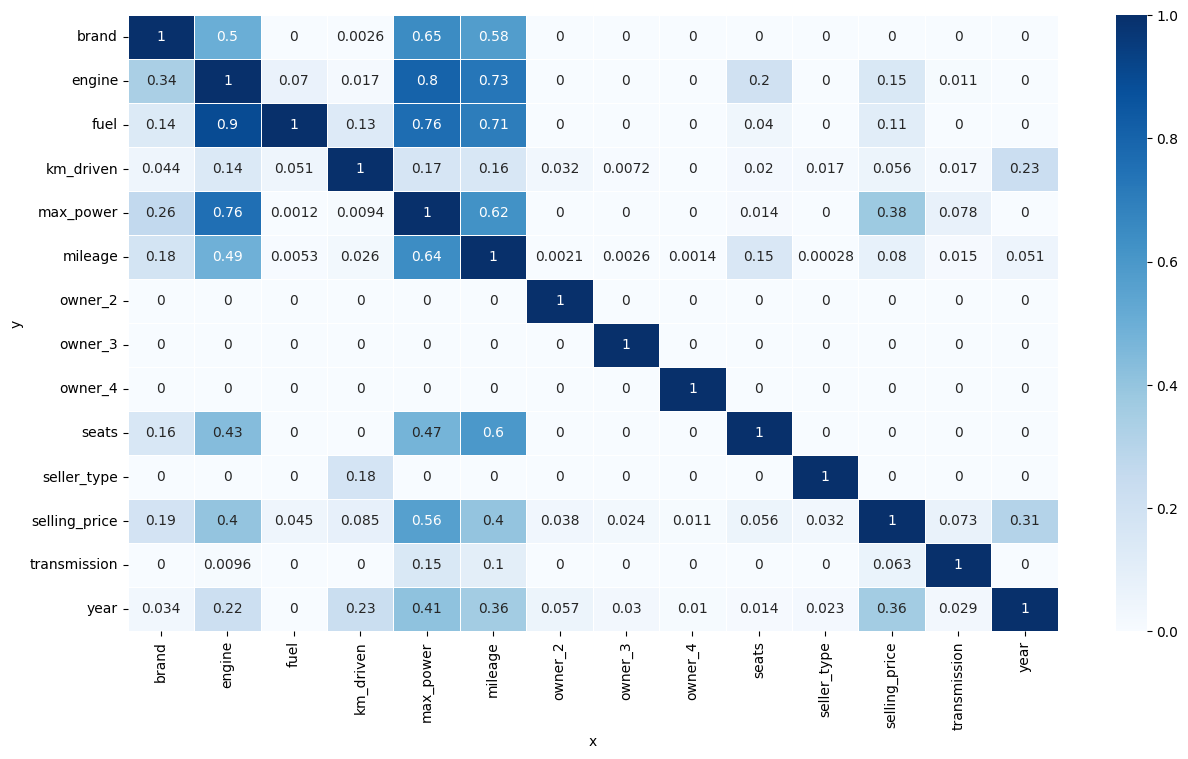

In [29]:
import ppscore as pps

# Copy dataframe
dfcopy = df.copy()

matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#Plot PPS map
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Feature Engineering

We don't need to Dimensionality reduction, Feature splitting, and Creating features in this data 

## 4. Feature selection

From the concept of Chaky company, I can cut 2 candidate feature including:
1. year: I don't know what year column mean. It may be year of starting to use a car or year of produced, so I cut it as candidate feature.
2. brand: Chaky company make new brand, so this column is not necessary to create model to predict Chaky's brand.

From the correlation matrix and scatterplot of engine and max power, I can conclude that engine and max power have a high correlation, and I pick one of those, which is max power as a feature and cut engine.

From the PPS map, I can analyze which feature is well predict the selling price, and I can order from good to bad score to predict the selling price:
1. max_power
2. mileage
3. km_driven
4. transmission
5. seats
6. fuel
7. owner_2
8. seller_type
9. owner_3
10. owner_4

In [30]:
# Select the strong features
#X = df[        ['max_power']        ]
#X = df[        ['max_power', 'mileage']        ]
#X = df[        ['max_power', 'mileage','owner']        ]
#X = df[        ['max_power', 'mileage','owner', 'km_driven']        ]
#X = df[        ['max_power', 'mileage','owner', 'km_driven', 'transmission']        ] 
#X = df[        ['max_power', 'mileage','owner', 'km_driven', 'transmission', 'seats']        ] 
X = df[        ['max_power', 'mileage','owner_2', 'owner_3','owner_4','km_driven', 'transmission', 'seats', 'fuel']        ]
#X = df[        ['max_power', 'mileage','owner', 'km_driven', 'transmission', 'seats', 'fuel', 'seller_type']        ]


# Assign selling price as label
y = df["selling_price"]

In [31]:
# Split the data to training set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


# Convert y_train and y_test to numpy array

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print(y_train)



[12.3883942  12.04355372 12.18075484 ... 13.52782849 15.45450727
 13.56061831]


## 5. Preprocessing

### Checking null values

In [32]:
# Check null in X_train
X_train.isna().sum()

max_power       165
mileage         171
owner_2           0
owner_3           0
owner_4           0
km_driven         0
transmission      0
seats           171
fuel              0
dtype: int64

In [33]:
# Check null in X_test
X_test.isna().sum()

max_power       43
mileage         43
owner_2          0
owner_3          0
owner_4          0
km_driven        0
transmission     0
seats           43
fuel             0
dtype: int64

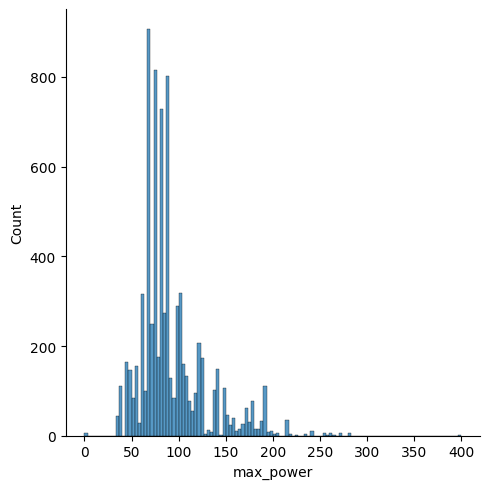

In [34]:
#Plot Distribution plot of max power
sns.displot(data=df, x='max_power')

In [35]:
# Find mean of max power
X_train['max_power'].mean()

91.78763944382293

In [36]:
# Find median of max power
X_train['max_power'].median()

82.85

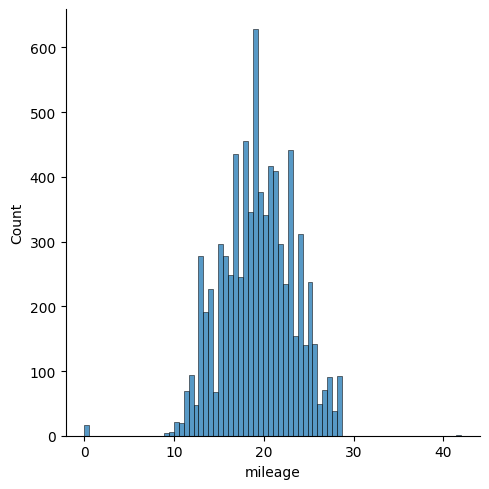

In [37]:
#Plot Distribution plot of mileage
sns.displot(data=df, x='mileage')

In [38]:
# Find mean of mileage
X_train['mileage'].mean()

19.383089105743082

In [39]:
# Find median of mileage
X_train['mileage'].median()

19.3

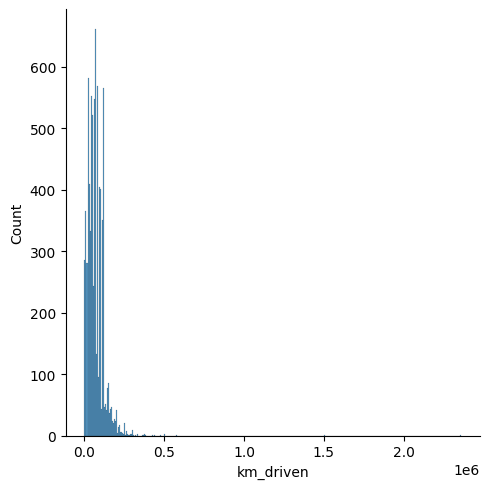

In [40]:
#Plot Distribution plot of km_driven
sns.displot(data=df, x='km_driven')

In [41]:
# Find mean of km_driven
X_train['km_driven'].mean()

70039.67440049829

In [42]:
# Find median of km_driven
X_train['km_driven'].median()

60000.0

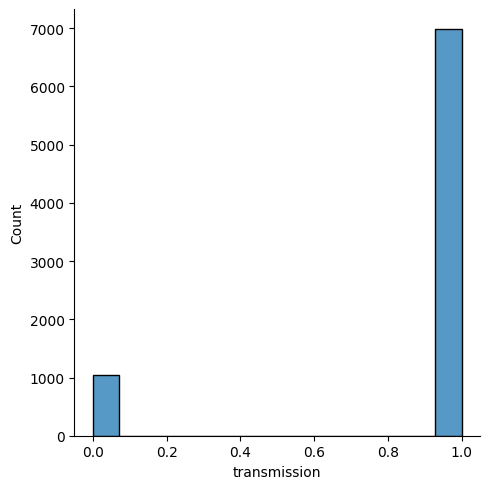

In [43]:
#Plot Distribution plot of transmission
sns.displot(data=df, x='transmission')

In [44]:
# Find mode of transmission
X_train['transmission'].mode()

0    1
Name: transmission, dtype: int64

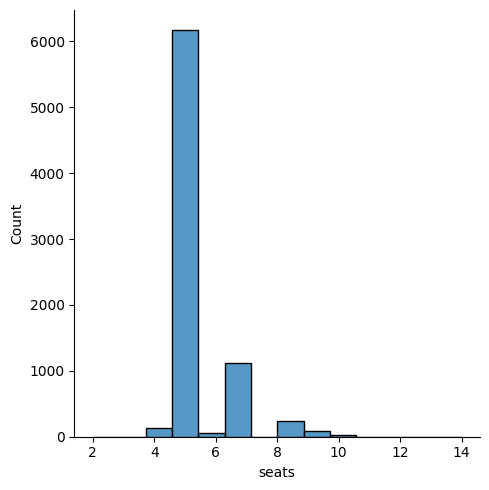

In [45]:
#Plot Distribution plot of seats
sns.displot(data=df, x='seats')

In [46]:
# Find mean of seats
X_train['seats'].mean()

5.425691889297712

In [47]:
# Find mean of seats
X_train['seats'].median()

5.0

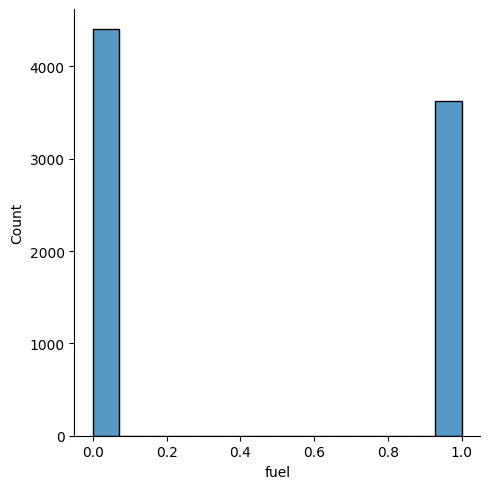

In [48]:
#Plot Distribution plot of fuel
sns.displot(data=df, x='fuel')

In [49]:
# Find mode of fuel
X_train['fuel'].mode()

0    0
Name: fuel, dtype: int64

In [50]:
# fill the mean and median to null value in the training set
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_train['seats'].fillna(X_train['seats'].median(), inplace=True)

In [51]:
# fill the mean and median of training set to null value in the test set
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
X_test['seats'].fillna(X_train['seats'].median(), inplace=True)

In [52]:
#check null in X_train again
X_train.isna().sum()

max_power       0
mileage         0
owner_2         0
owner_3         0
owner_4         0
km_driven       0
transmission    0
seats           0
fuel            0
dtype: int64

In [53]:
#check null in X_test again
X_test.isna().sum()

max_power       0
mileage         0
owner_2         0
owner_3         0
owner_4         0
km_driven       0
transmission    0
seats           0
fuel            0
dtype: int64

### Checking Outliers

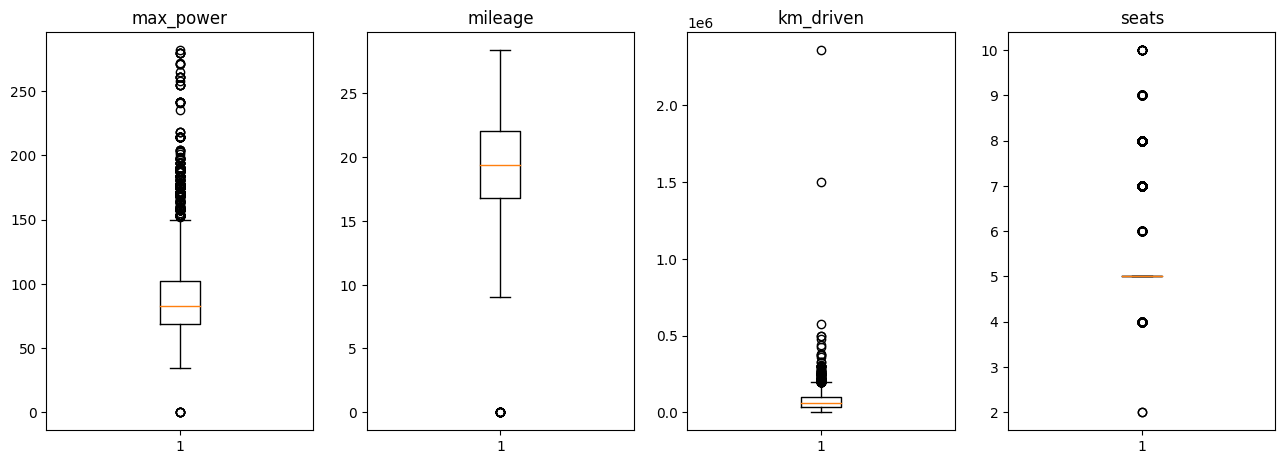

In [54]:
# Check outlier in numeric column (not category column)
# Create a dictionary of columns.
col_dict = {'max_power':1,'mileage':2,'km_driven':3, 'seats':4}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,5,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [55]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [56]:
for col in X_train[['max_power','mileage', 'km_driven', 'seats']].columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 459
Percent of data that is outlier: 7.15%

---------------mileage---------------

Number of outliers: 16
Percent of data that is outlier: 0.25%

---------------km_driven---------------

Number of outliers: 119
Percent of data that is outlier: 1.85%

---------------seats---------------

Number of outliers: 1346
Percent of data that is outlier: 20.96%


In [57]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 9)
Shape of X_test:  (1606, 9)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [58]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from math import *
from random import *
from time import time


m = X.shape[0]  #number of samples
n = X.shape[1]  #number of features

# Scale only numeric column
scaler = StandardScaler()
X_train[['max_power', 'mileage', 'km_driven', 'seats']] = scaler.fit_transform(X_train[['max_power', 'mileage', 'km_driven', 'seats']])
X_test[['max_power', 'mileage', 'km_driven', 'seats']]  = scaler.transform(X_test[['max_power', 'mileage', 'km_driven', 'seats']])

# Insert 1 on first index of each samples
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [59]:
# Save the scaler value for using it in app.py
import pickle

pickle.dump(scaler, open('scaler.pkl', 'wb'))

## 6. Modeling

In [60]:
#experiment tracking
import mlflow
import os
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("http://mlflow:5000")
# In the dockerized way, the user who runs this code will be `root`.
# The MLflow will also log the run user_id as `root`.
# To change that, we need to set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "noppawee"
#mlflow.create_experiment(name="noppawee-ML-assignment2")  #create if you haven't create
mlflow.set_experiment(experiment_name="noppawee-ML-a2")

<Experiment: artifact_location='mlflow-artifacts:/997382005615191557', creation_time=1694490527218, experiment_id='997382005615191557', last_update_time=1694490527218, lifecycle_stage='active', name='noppawee-ML-a2', tags={}>

In [61]:
from sklearn.model_selection import KFold

# Create the Linear regression class
class LinearRegression(object):
    
    
    kfold = KFold(n_splits=3)
            
    def __init__(self, regularization, theta_method, momentum, lr=0.001, method='batch', num_epochs=50, batch_size=50, cv=kfold):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.regularization = regularization
        self.theta_method = theta_method
        self.momentum = momentum

    # A2 task1: Create R2 function
    def r2(self, ytrue, ypred):
        return 1-(((ypred - ytrue) ** 2).sum() / (((ytrue.sum()/ytrue.shape[0])- ytrue) ** 2).sum())

    def mse(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]
    
    def mse_sto(self, ytrue, ypred):
        return ((ypred - ytrue) ** 2).sum()    

    
    def fit(self, X_train, y_train):
            
        #create a list of kfold scores (mse)
        self.kfold_scores = list()

        #create a list of kfold r2
        self.kfold_r2_scores = list()
        
        #reset val loss
        self.val_loss_old = np.infty

        #kfold.split in the sklearn.....
        #5 splits
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            
            if self.theta_method == 'zero':
                self.theta = np.zeros(X_cross_train.shape[1])
            else:
                # A2 task2: create initial theta by Xavier method
                #number of samples
                m = X_cross_train.shape[0]
                #calculate the range for theta
                lower , upper = -(1.0 / sqrt(m)), (1.0 / sqrt(m))
                #generate random number
                numbers = np.random.rand(X_cross_train.shape[1])
                self.theta = lower+numbers*(upper-lower)
            #reset previous gradient 
            self.prev_grad = np.zeros(X_cross_train.shape[1])
            
            #define X_cross_train as only a subset of the data
            #how big is this subset?  => mini-batch size ==> 50
            
            #one epoch will exhaust the WHOLE training set
            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__, "theta": self.theta_method, "momentum": self.momentum}
                mlflow.log_params(params=params)
                
                for epoch in range(self.num_epochs):
                
                    #shuffle the index
                    perm = np.random.permutation(X_cross_train.shape[0])
                            
                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]
                    
                    if self.method == 'sto':
                        for batch_idx in range(X_cross_train.shape[0]):
                            X_method_train = X_cross_train[batch_idx].reshape(1, -1) 
                            y_method_train = y_cross_train[batch_idx] 
                            train_loss = self._train_sto(X_method_train, y_method_train)
                            
                    elif self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                            train_loss = self._train(X_method_train, y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train, y_method_train)

                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)

                    yhat_val = self.predict(X_cross_val)
                    val_loss_new = self.mse(y_cross_val, yhat_val)
                    r2 = self.r2(y_cross_val, yhat_val)
                    mlflow.log_metric(key="mse", value=val_loss_new, step=epoch)
                    mlflow.log_metric(key="r2", value=r2, step=epoch)
                                                           
                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        break
                    self.val_loss_old = val_loss_new
            
                self.kfold_scores.append(val_loss_new)
                self.kfold_r2_scores.append(r2)
                print(f"Fold {fold}: mse = {val_loss_new}, r2= {r2}")
        print(f"Mean of mse: {sum(self.kfold_scores) / len(self.kfold_scores)}")    
        print(f"Mean of r2: {sum(self.kfold_r2_scores) / len(self.kfold_r2_scores)}")
        for i, theta in enumerate(self.theta[1:]):
            mlflow.log_metric(key=f"theta-{i}", value=theta)
        
        mlflow.log_metric(key="Mean of mse", value=sum(self.kfold_scores) / len(self.kfold_scores))
        mlflow.log_metric(key="Mean of r2", value=sum(self.kfold_r2_scores) / len(self.kfold_r2_scores))
        params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__, "theta": self.theta_method, "momentum": self.momentum}
        mlflow.log_params(params=params)
             
    # A2 task3: Add momentum on train function                
    def _train(self, X, y):  
        yhat = self.predict(X)
        m    = X.shape[0]    
        grad = (1/m) * X.T@(yhat - y) + self.regularization.derivation(self.theta)
        self.theta = self.theta - (self.lr * grad) + self.momentum*self.prev_grad
        self.prev_grad = grad
        return self.mse(y, yhat)
    
    def _train_sto(self, X, y):  
        yhat = self.predict(X)
        m    = X.shape[0]    
        grad = (1/m) * X.T@(yhat - y) + self.regularization.derivation(self.theta)
        self.theta = self.theta - (self.lr * grad) + self.momentum*self.prev_grad
        self.prev_grad = grad
        return self.mse_sto(y, yhat)
    
       
    def predict(self, X):
        return X @ self.theta  #===>(m, n) @ (n, )
    
    def _coef(self):
        return self.theta[1:]  #remind that theta is (w0, w1, w2, w3, w4.....wn)
                               #w0 is the bias or the intercept
                               #w1....wn are the weights / coefficients / theta
    def _bias(self):
        return self.theta[0]


    
    # A2 task4: Plot feature importance
    def feature_importance(self):
        coefs = pd.DataFrame(
        self.theta[1:], columns=["Coefficients"], index=['max_power', 'mileage','owner_2', 'owner_3','owner_4','km_driven', 'transmission', 'seats', 'fuel']
        )

        coefs.plot(kind="barh", figsize=(9, 7))
        plt.title("Feature Importance")
        plt.axvline(x=0, color=".5")
        plt.subplots_adjust(left=0.3)


In [62]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta

class NormalPenalty:

    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0
        
    def derivation(self, theta):
        return 0
    
    
class Lasso(LinearRegression):
    
    def __init__(self, method, theta_method,momentum, lr, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, theta_method, momentum, lr, method)
        
class Ridge(LinearRegression):
    
    def __init__(self, method,theta_method,momentum, lr, l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization,theta_method, momentum, lr, method)

class Normal(LinearRegression):
    
    def __init__(self, method,theta_method,momentum, lr, l):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization,theta_method, momentum, lr, method)
        

In [63]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [ ]:
# Model with momentum

regs = ["Ridge", "Lasso", "Normal"]
methods = ["sto","mini", "batch"]
theta_methods = ["zero", "xavier"]
lrs = [0.01,0.001,0.0001]
for reg in regs:
    for method in methods:
        for theta in theta_methods:
            for lr in lrs:
                params = {"method": method,"theta_method":theta,"momentum":0.00001, "lr": lr, "l": 0.1}
                mlflow.start_run(run_name=f"method-{params['method']}-theta-{params['theta_method']}-with momentum-lr-{params['lr']}-reg-{reg}", nested=True)
    
                print("="*5, reg,method,theta,lr,"with momemtum","="*5)

                # #######
                type_of_regression = str_to_class(reg)    #Ridge, Lasso, Normal
                model = type_of_regression(**params)  
                model.fit(X_train, y_train)

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                # #######

                mlflow.end_run()

===== Ridge sto zero 0.01 with momemtum =====
Fold 0: mse = 4.590904940146681, r2= -5.770099006989539
Fold 1: mse = 4.498594283364408, r2= -5.302881874915117
Fold 2: mse = 4.14470601815088, r2= -4.864716588014122
Mean of mse: 4.411401747220656
Mean of r2: -5.312565823306259
===== Ridge sto zero 0.001 with momemtum =====
Fold 0: mse = 4.430763888411541, r2= -5.533942783006454
Fold 1: mse = 4.577505160189816, r2= -5.413442175299563
Fold 2: mse = 4.435934413151105, r2= -5.276801785752837
Mean of mse: 4.481401153917488
Mean of r2: -5.408062248019618
===== Ridge sto zero 0.0001 with momemtum =====
Fold 0: mse = 4.309150422333821, r2= -5.354602278974362
Fold 1: mse = 4.605163973631519, r2= -5.452194332738618
Fold 2: mse = 4.438151254664242, r2= -5.279938593801021
Mean of mse: 4.4508218835431945
Mean of r2: -5.3622450685046665
===== Ridge sto xavier 0.01 with momemtum =====
Fold 0: mse = 3.7887636002755967, r2= -4.58720013207775
Fold 1: mse = 4.145536977598869, r2= -4.808221020179905
Fold 2: 

In [ ]:
# Model without momentum

regs = ["Ridge", "Lasso", "Normal"]
methods = ["sto","mini", "batch"]
theta_methods = ["zero", "xavier"]
lrs = [0.01,0.001,0.0001]
for reg in regs:
    for method in methods:
        for theta in theta_methods:
            for lr in lrs:
                params = {"method": method,"theta_method":theta,"momentum":0, "lr": lr, "l": 0.1}
                mlflow.start_run(run_name=f"method-{params['method']}-theta-{params['theta_method']}-without momentum-lr-{params['lr']}-reg-{reg}", nested=True)
    
                print("="*5, reg,method,theta,lr,"without momemtum","="*5)

                # #######
                type_of_regression = str_to_class(reg)    #Ridge, Lasso, Normal
                model = type_of_regression(**params)  
                model.fit(X_train, y_train)

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                # #######

                mlflow.end_run()

===== Ridge sto zero 0.01 without momemtum =====
Fold 0: mse = 4.974847008416782, r2= -6.336289300412142
Fold 1: mse = 4.9840032644966525, r2= -5.982977761848784
Fold 2: mse = 4.222257501938629, r2= -4.974451143710797
Mean of mse: 4.7270359249506875
Mean of r2: -5.764572735323909
===== Ridge sto zero 0.001 without momemtum =====
Fold 0: mse = 4.260400582297161, r2= -5.2827120420982006
Fold 1: mse = 4.603143599768556, r2= -5.44936363119069
Fold 2: mse = 4.591909782538215, r2= -5.497505336779194
Mean of mse: 4.4851513215346435
Mean of r2: -5.409860336689362
===== Ridge sto zero 0.0001 without momemtum =====
Fold 0: mse = 4.289749682620961, r2= -5.325992466665615
Fold 1: mse = 4.608789194247136, r2= -5.457273549905466
Fold 2: mse = 4.425686333938605, r2= -5.2623008585725675
Mean of mse: 4.441408403602234
Mean of r2: -5.348522291714549
===== Ridge sto xavier 0.01 without momemtum =====
Fold 0: mse = 4.058508422522746, r2= -4.984986445897101
Fold 1: mse = 4.458172321724804, r2= -5.246247550

## 7. Testing

Test the model with test set (X_test)

In [65]:
#mean of mse = 0.203
#mean of r2 = 0.71
# params = {"method": 'sto',"theta_method":'zero',"momentum":0.00001, "lr": 0.001, "l": 0.1, "reg": 'Normal'}

model = mlflow.pyfunc.load_model('runs:/b302d93cc0784c89b1eedbb69ac7006c/model/')
yhat = model.predict(X_test)
mse  = ((yhat - y_test) ** 2).sum() / y_test.shape[0]
r2 = 1-(((yhat - y_test) ** 2).sum() / (((y_test.sum()/y_test.shape[0])- y_test) ** 2).sum())


print("MSE in test set: ", mse)
print("R2 in test set: ", r2)


MSE in test set:  0.18332840070074524
R2 in test set:  0.7425674117570982


## 8. Analysis:  Feature Importance

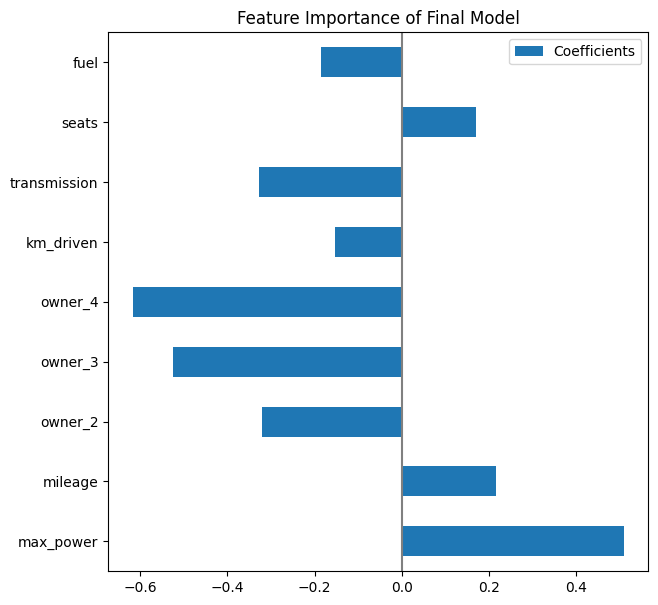

In [66]:
def feature_importance(theta):
        coefs = pd.DataFrame(
        theta, columns=["Coefficients"], index=['max_power', 'mileage','owner_2', 'owner_3','owner_4','km_driven', 'transmission', 'seats', 'fuel']
        )

        coefs.plot(kind="barh", figsize=(9, 7))
        plt.title("Feature Importance of Final Model")
        plt.axvline(x=0, color=".5")
        plt.subplots_adjust(left=0.3)

# Show the feature importance p;ot        
run = mlflow.get_run(run_id="b302d93cc0784c89b1eedbb69ac7006c")
all_theta = list()
for i in range(X_train.shape[1]-1):
        all_theta.append(run.data.metrics[f'theta-{i}'])
feature_importance(all_theta)



From the graph, we can see that the most 3 feature importances are owner_4, owner_3, and max_power. For owner, if a car has many hands, the price of the car is low. For max power, if the max power of the car is high which means the good engine of a car, the price of the car is high.

## 9. Inference

In [67]:
# Try to create the example from the dataset
df[ ['max_power', 'mileage','owner_2', 'owner_3','owner_4','km_driven', 'transmission', 'seats', 'fuel']].loc[1]

max_power          103.52
mileage             21.14
owner_2              1.00
owner_3              0.00
owner_4              0.00
km_driven       120000.00
transmission         1.00
seats                5.00
fuel                 0.00
Name: 1, dtype: float64

In [68]:
# The real selling price of this sample
np.exp(df['selling_price'].loc[1])

370000.0000000001

In [69]:
# Create array of sample data

[max_power, mileage, km_driven, seats]  = scaler.transform([[103.52,21.14,120000,5]])[0]
sample = np.array([[max_power, mileage, 1,0,0, km_driven,1,seats,0]])  
intercept = np.ones((1, 1))
sample   = np.concatenate((intercept, sample), axis=1)

# Predict the selling price
predicted_price = model.predict(sample)
predicted_price = np.exp(predicted_price)
predicted_price

array([408083.21558282])

I have many models that I tried to train, so I will compare the best 20 models based on mean of mse and r2 in below table.

| | Model Name  | Mean of MSE  | Mean of R2  
|---:|:------------------------------------------------------|:-----------|:------
| 1 | method-sto-theta-zero-with momentum-lr-0.001-reg-Normal  | 0.203       | 0.71  
| 2 | method-sto-theta-xavier-with momentum-lr-0.001-reg-Normal | 0.205    | 	0.708   
| 3 | method-sto-theta-zero-without momentum-lr-0.01-reg-Normal | 0.211    | 	0.699  
| 4 | method-sto-theta-zero-without momentum-lr-0.001-reg-Normal | 0.213    | 	0.695   
| 5 | method-sto-theta-xavier-with momentum-lr-0.01-reg-Normal | 0.216    | 	0.691   
| 6 | method-sto-theta-xavier-without momentum-lr-0.01-reg-Normal | 0.217    | 	0.69   
| 7 | method-sto-theta-xavier-without momentum-lr-0.001-reg-Normal | 0.22   | 	0.685   
| 8 | method-sto-theta-zero-with momentum-lr-0.01-reg-Normal | 0.226    | 	0.677   
| 9 | method-sto-theta-zero-with momentum-lr-0.01-reg-Lasso | 0.307    | 	0.561   
| 10 | method-sto-theta-xavier-without momentum-lr-0.01-reg-Lasso | 0.312    | 	0.554 
| 11 | method-sto-theta-xavier-with momentum-lr-0.01-reg-Lasso | 0.312    | 	0.553     
| 12 | method-sto-theta-xavier-with momentum-lr-0.001-reg-Lasso | 0.321    | 	0.541   
| 13 | method-sto-theta-zero-without momentum-lr-0.01-reg-Lasso | 0.324    | 	0.537   
| 14 | method-sto-theta-zero-without momentum-lr-0.001-reg-Lasso | 0.327    | 	0.533   
| 15 | method-sto-theta-xavier-without momentum-lr-0.001-reg-Lasso | 0.329    | 	0.53   
| 16 | method-sto-theta-zero-with momentum-lr-0.001-reg-Lasso | 0.334    | 	0.522   
| 17 | method-mini-theta-xavier-without momentum-lr-0.01-reg-Normal | 0.354    | 	0.493   
| 18 | method-mini-theta-zero-with momentum-lr-0.01-reg-Normal | 0.355    | 	0.493   
| 19 | method-mini-theta-zero-without momentum-lr-0.01-reg-Normal | 0.355    | 	0.492   
| 20 | method-mini-theta-xavier-with momentum-lr-0.01-reg-Normal | 0.356    | 	0.491  



As you can see in the table, the best model is method-sto-theta-zero-with momentum-lr-0.001-reg-Normal. the model got 0.203 of MSE and 0.71 of R2. Moreover, I can conclude many things:
1. stochastic gradient descent is better than mini batch and batch gradient descent. 
2. Normal regression is better than Ridge and Lasso regression.
3. Model with momentum is better than Model without momentum.
4. Most model with theta zero is better than model with theta xavier.

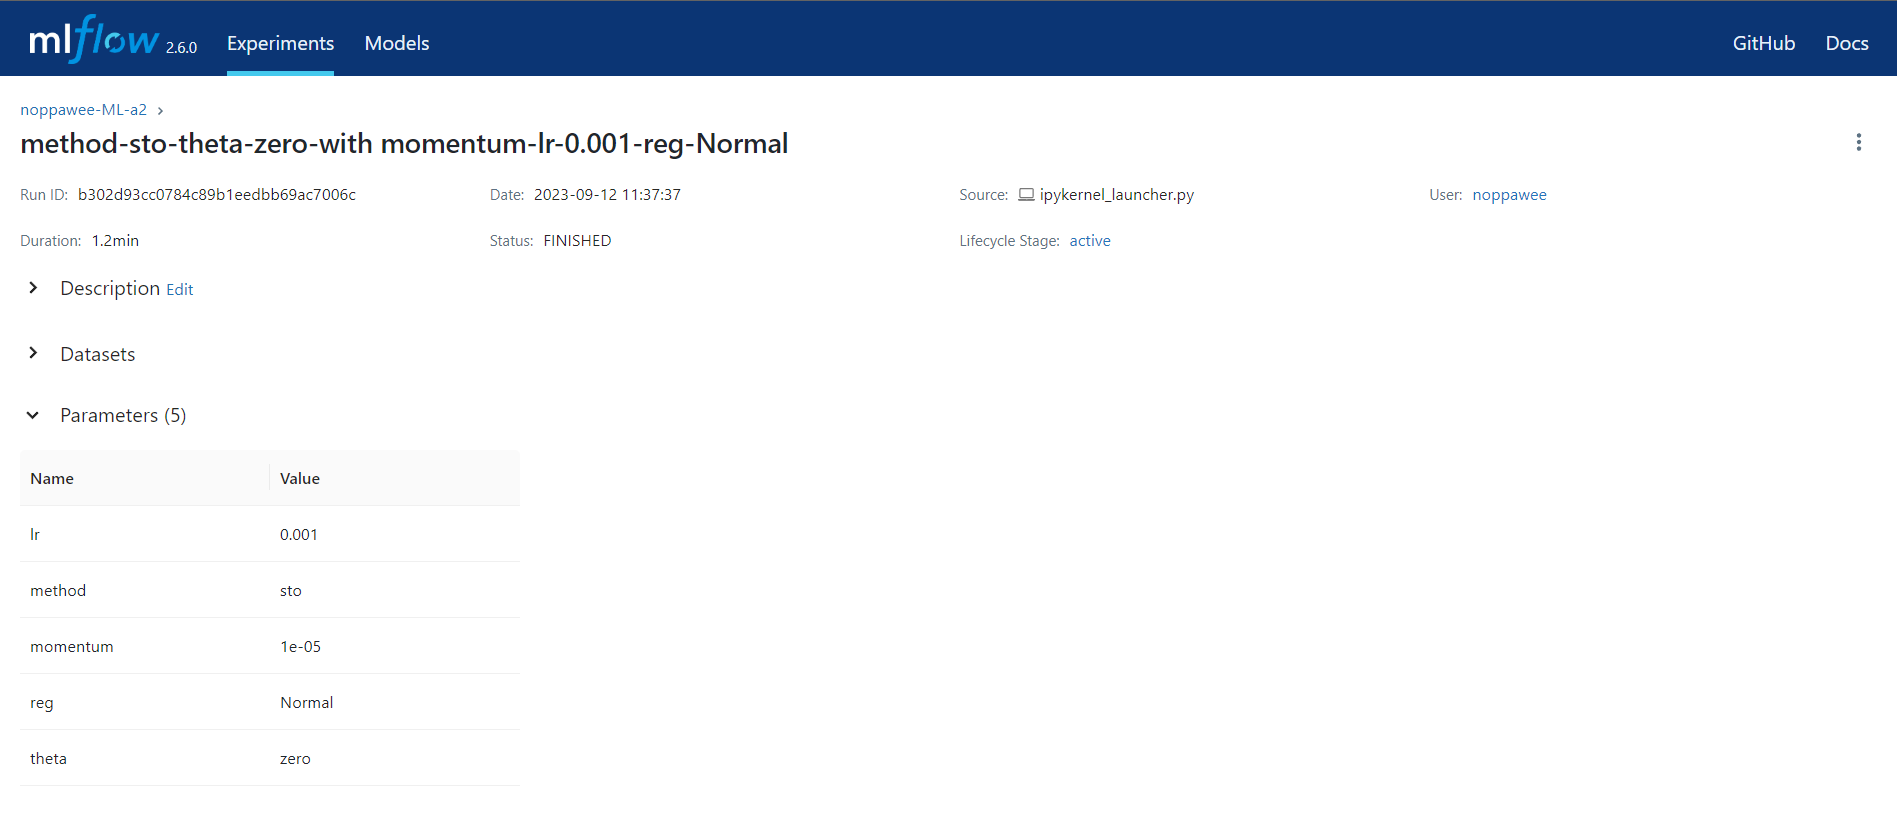

In [ ]:
#show the parameter of my best model
from IPython.display import Image
Image("/root/code/MLflow_screenshot.png")

This is the picture shown the parameter of my best model
1. Learning rate = 0.001
2. Gradient method = stochastic gradient descent
3. Momentum = 0.00001 (with momentum)
4. Regression method = Normal regression
5. Theta method = Zero method